In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 4)})

In [2]:
df = pd.read_csv('AllTraffic_1.csv', sep='\t')
#df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,20,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# assignable_protocols = ['TCP', 'UDP', 'pcap', 'None']
# df['protocol'].loc[df['protocol'].isin(assignable_protocols)] = df.loc[df['protocol'].isin(assignable_protocols)]['destination_port'].map(ports_df.to_dict()['description'])

In [4]:
ports_extra_df = pd.read_csv('ports.csv', sep=',')
ports_df = ports_extra_df[['port', 'description']].set_index('port')
ports_df.index = ports_df.index.astype(str)

#clean data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']
df['actual_protocol'] = df['destination_port'].map(ports_df.to_dict()['description'])

In [5]:
export_graphs = False
export_html = False
export_excel = False

## Question 1
### Top 25 Attacking Countries

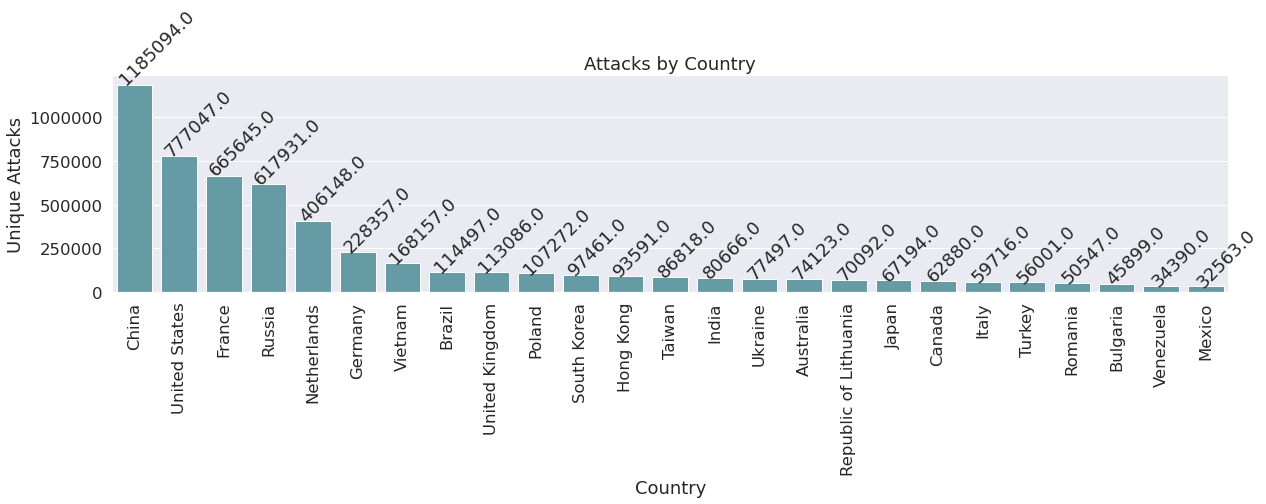

In [6]:
country_df = df.groupby(
    'country'
)['id'].count().sort_values(ascending=False)[:25].to_frame(name='attack counts')

fg = sns.barplot(data=country_df,
                 x=country_df.index,
                 y='attack counts',
                 color='#5aa2af', dodge=False)
fg.set_xticklabels(fg.get_xticklabels() , rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
    
fg.set(xlabel='Country', ylabel='Unique Attacks', title='Attacks by Country')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# country_df

This graph depicts a countries total attacks ordered from most to least taking the top 25 countries. China is shown to be the country with the highest attack origins. This information is useful to determine where efforts should be placed when it comes to combating attacks. Developing stratagies to inspect data from high ranking sources may help prevent or reduce the occurances of attacks.

In [7]:
if export_graphs: fg.get_figure().savefig('questions/Q1.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q1.html', 'w') as f:
        f.write(country_df.to_html())
if export_excel: country_df.to_excel('excelsheets/Q1.xlsx')
# plt.clf()

## Question 2
### Top 25 Tor Attacking Countries 

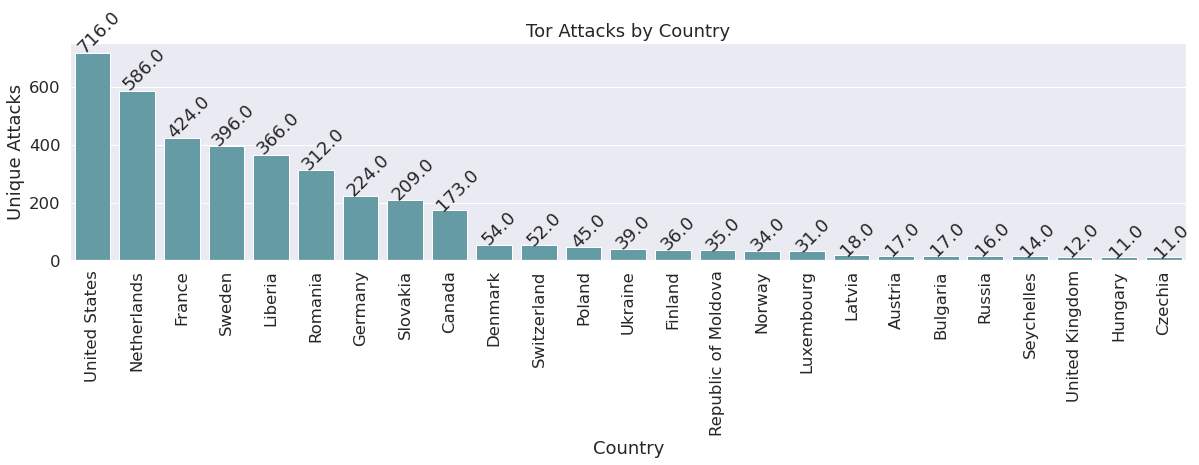

In [8]:
tor_country_df = df[df['Tor_flag'] == 'Y'].groupby(
    'country'
)['id'].count().sort_values(ascending=False)[:25].to_frame(name='attack counts')

fg = sns.barplot(data=tor_country_df,
                 x=tor_country_df.index,
                 y='attack counts',
                 color='#5aa2af', dodge=False)
fg.set_xticklabels(fg.get_xticklabels() , rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

    fg.set(xlabel='Country', ylabel='Unique Attacks', title='Tor Attacks by Country')

#tor_country_df

This graph depicts a countries tor attacks ordered from most to least taking the top 25 countries. United States is shown to be the country with the highest attack origins. Much like the above this information is useful to determine where efforts should be placed when it comes to combating attacks. Seeing the United States as the lead for attack origin may be due to multiple reasons. The highest consentration of Tor exit nodes seem to be from the United States, indicating that this may lead to more attack occurances originating from there. This website graphs Tor exit node information showing United States as the top and interestingly follows our graph quite well indicating that total number of Tor exit nodes a country has corresponds to total attacks originating from there (to some degree). (https://hackertarget.com/tor-exit-node-visualization/)

In [9]:
if export_graphs: fg.get_figure().savefig('questions/Q2.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q2.html', 'w') as f:
        f.write(tor_country_df.to_html())
if export_excel: tor_country_df.to_excel('excelsheets/Q2.xlsx')
# plt.clf()

## Question 3
### Top 25 Attacking Tor IPs

[Text(0, 0.5, 'Unique Attacks'),
 Text(0.5, 0, 'Tor Ip'),
 Text(0.5, 1.0, 'Attacks by Unique Tor IP')]

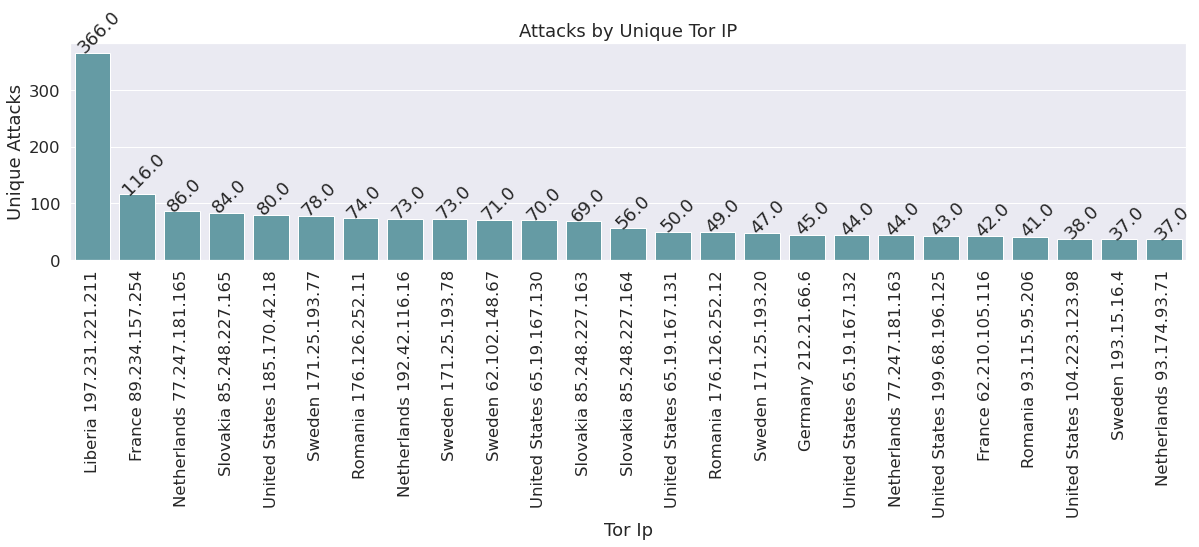

In [10]:
tor_ips_df = df[df['Tor_flag'] == 'Y'].groupby('source_ip').agg({
    'id': lambda x: x.nunique(), 
    'country': lambda y: y.unique(),
}).sort_values(by='id', ascending=False).rename(columns={'id': 'attack_counts'})[:25]

fg = sns.barplot(data=tor_ips_df,
                 x=tor_ips_df.index,
                 y='attack_counts',
                 color='#5aa2af', dodge=False)

labels = [tor_ips_df.loc[label.get_text()]['country'] + 
          ' ' + 
          label.get_text() for label in fg.get_xticklabels()
         ]
fg.set_xticklabels(labels, rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Tor Ip', ylabel='Unique Attacks', title='Attacks by Unique Tor IP')

#tor_ips_df

This graph depicts an ips tor attacks ordered from most to least taking the top 25 ips. '197.231.221.211' is shown to be the ip with the highest attack origins. This information again is useful to determine where efforts should be placed for combating attacks. Deferent though is the degree to which restrictions can be placed with information such as this. These top Tor attack ips can surely be blacklisted and would pose no effect on a companies legitimate service users.

In [11]:
if export_graphs: fg.get_figure().savefig('questions/Q3.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q3.html', 'w') as f:
        f.write(tor_ips_df.to_html())
if export_excel: tor_ips_df.to_excel('excelsheets/Q3.xlsx')
# plt.clf()

## Question 4
### Top 25 Attack Protocols

attack_counts  \
actual_protocol                                    
SSH Remote Login Protocol                1226690   
SIP                                       510859   
Telnet                                    481348   
World Wide Web HTTP                       268750   
VNC Virtual Network Computing             163874   
MS WBT Server                             136735   
MySQL                                      57032   
HTTP                                       30409   
codasrv-se                                 29589   
File Transfer [Control]                    20474   
HTTP protocol over TLS/SSL                 18598   
Personal Agent                             14512   
HTTP / HTTP Proxy                           9413   
Domain Name Server                          9040   
Distributed Service Coordinator             8773   
IBM DB2                                     8477   
Simple Mail Transfer                        7880   
SMTP protocol over TLS/SSL                  7323   
Berkeley rshd with SPX auth                 6853   
iRDMI                                       6643   
pptp                                        6642   
Submission                                  6594   
CSlistener                                  6300   
nCube License Manager                       5936   
FTP protocol control over TLS/SSL           5697   

                                                       destination_port  \
actual_protocol                                                           
SSH Remote Login Protocol                                            22   
SIP                                                                5060   
Telnet                                                               23   
World Wide Web HTTP                                                  80   
VNC Virtual Network Computing      [5800, 5900, 5901, 5980, 5801, 5981]   
MS WBT Server                                                      3389   
MySQL                                                              3306   
HTTP                                                               8080   
codasrv-se                                                         2433   
File Transfer [Control]                                              21   
HTTP protocol over TLS/SSL                                          443   
Personal Agent                                                     5555   
HTTP / HTTP Proxy                                                  8081   
Domain Name Server                                                   53   
Distributed Service Coordinator                                    3390   
IBM DB2                                                            6789   
Simple Mail Transfer                                                 25   
SMTP protocol over TLS/SSL                                          465   
Berkeley rshd with SPX auth                                         222   
iRDMI                                                              8000   
pptp                                                               1723   
Submission                                                          587   
CSlistener                                                         9000   
nCube License Manager                                              1521   
FTP protocol control over TLS/SSL                                   990   

                                                          protocol  
actual_protocol                                                     
SSH Remote Login Protocol                    [SSH, TCP, pcap, UDP]  
SIP                                [UDP, SipSession, SipCall, TCP]  
Telnet                                                 [TCP, pcap]  
World Wide Web HTTP                  [http, TCP, https, UDP, pcap]  
VNC Virtual Network Computing                     [TCP, pcap, UDP]  
MS WBT Server                                          [TCP, pcap]  
MySQL                                           [TCP

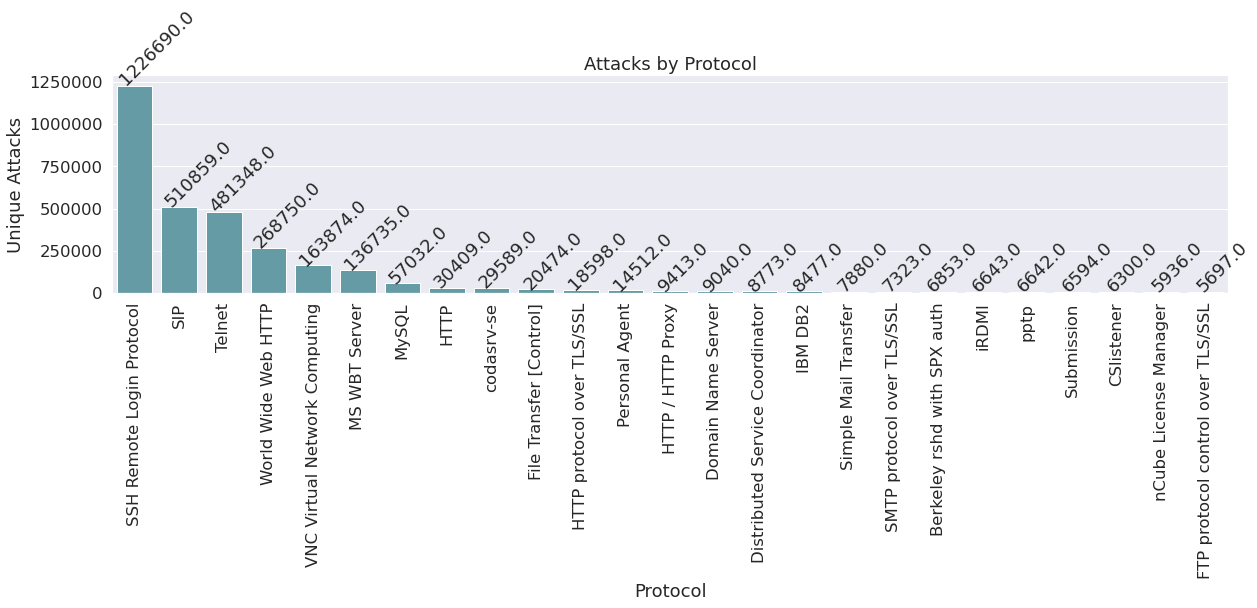

In [12]:
proto_df = df.groupby('actual_protocol').agg({
    'id': lambda x: x.nunique(),
    'destination_port': lambda port: port.unique(),
    'protocol': lambda proto: proto.unique(),
}).sort_values(by='id', ascending=False).rename(columns={'id': 'attack_counts'})

proto_df = proto_df.drop(index='3d-nfsd')
proto_df = proto_df.drop(index='HOSTS2 Name Server')

proto_df = proto_df[:25]

fg = sns.barplot(data=proto_df, x=proto_df.index, y='attack_counts', color='#5aa2af')
fg.set_xticklabels(fg.get_xticklabels(), rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Protocol', ylabel='Unique Attacks', title='Attacks by Protocol')
fg.ticklabel_format(style='plain', axis='y')

proto_df

This graph depicts attack protocols ordered from most attack occurances to least. This information again is useful to determine where efforts should be placed for combating attacks. SSH being a large portion of this attack data, may warrant some additional precation when utilizing this protocol. Utilizing cryptography keys versus just passwords, removing root login, or even moving from port 22 to another can greatly reduce the attacks and potential impact an open ssh service can have when exposed to the internet.

In [13]:
if export_graphs: fg.get_figure().savefig('questions/Q4.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q4.html', 'w') as f:
        f.write(proto_df.to_html())
if export_excel: proto_df.to_excel('excelsheets/Q4.xlsx')
# plt.clf()

## Question 5
### Top 25 Countries by Protocol

In [14]:
country_proto_df = df.groupby(
    [
        'country', 
        'actual_protocol'
    ]
)['id'].count().sort_values(ascending=False).unstack().fillna(0)
country_proto_df['Totals'] = country_proto_df.sum(axis=1)

if export_html:
    with open('questions/Q5.html', 'w') as f:
        f.write(country_proto_df.to_html())
if export_excel: country_proto_df.to_excel('excelsheets/Q5.xlsx')

# country_proto_df

### Top 25 Countries by Protocol (Tor)

In [15]:
country_proto_tor_df = df[df['Tor_flag'] == 'Y'].groupby(
    [
        'country',
        'actual_protocol'
    ]
)['id'].count().sort_values(ascending=False).unstack().reindex(
    columns=country_proto_df.columns.tolist()
).dropna(axis=1, how='all').fillna(0)
country_proto_tor_df['Totals'] = country_proto_tor_df.sum(axis=1)

if export_html:
    with open('questions/Q5_Tor.html', 'w') as f:
        f.write(country_proto_tor_df.to_html())
if export_excel: country_proto_tor_df.to_excel('excelsheets/Q5_tor.xlsx')

# country_proto_tor_df

The table constructed shows the counts of attacks based on protocols originating from a given country, for Tor and non-Tor datasets. In both cases we see SSH as the largest portion of attacks.

## Question 6
### Attack hour 

In [16]:
week_day_df = df.groupby(['week day', 'hour'])['id'].nunique()
week_day_df = week_day_df.unstack().transpose()
# week_day_df

In [17]:
top_hour_df = week_day_df.T.idxmax(1).to_frame(name='hour').reindex(
    index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat'])
top_hour_attack_count_df = week_day_df.T.max(1).to_frame(name='max count').reindex(
    index = ['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat'])
top_hour_combined_df = pd.concat([top_hour_df, top_hour_attack_count_df], axis=1)

[Text(0, 0.5, 'Hour of the Day'),
 Text(0.5, 0, 'Day of the Week'),
 Text(0.5, 1.0, 'Attacks by Day-Hour')]

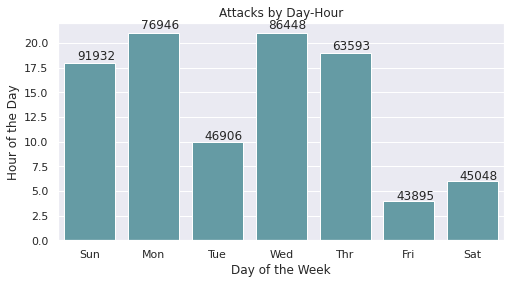

In [18]:
sns.set(rc={'figure.figsize':(8, 4)})

fg = sns.barplot(data=top_hour_df, x=top_hour_df.index, y='hour', color='#5aa2af')
for p, label in zip(fg.patches, top_hour_attack_count_df['max count']):
    fg.annotate(label, (p.get_x() + 0.2, p.get_height() * 1.02))
fg.set(xlabel='Day of the Week', ylabel='Hour of the Day', title='Attacks by Day-Hour')

This graph depicts the most active hours of each week with hour on the y-axis and day of the week on the x-axis. We can see that late night and early morning seem to be the most active attack times. 

In [19]:
if export_graphs: fg.get_figure().savefig('questions/Q6.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q6.html', 'w') as f:
        f.write(top_hour_combined_df.to_html())
if export_excel: top_hour_combined_df.to_excel('excelsheets/Q6.xlsx')
# plt.clf()

## Question 7
### SSH logins

In [20]:
cowrie_df = pd.read_csv('cowrie_1.csv', sep='\t')
cowrie_df['timestamp'] = pd.to_datetime(cowrie_df['timestamp'])

cowrie_df.index = cowrie_df['timestamp']
# removal due to payload_endTime equaling '2017-12-05 23:' and 
# not being parsable by pd.to_datetime
cowrie_df = cowrie_df[cowrie_df.index != '2017-12-05 23:02:44.121']
cowrie_df['attack_duration'] = (
    pd.to_datetime(cowrie_df['payload_endTime']) - 
    pd.to_datetime(cowrie_df['payload_startTime'])
).dt.total_seconds().round()

# converts the credentials column into an array
from ast import literal_eval
cowrie_df['credential_lol'] = cowrie_df['credentials'].apply(literal_eval)
# cowrie_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
sshloggedin_df = cowrie_df.loc[cowrie_df['loggedin'] != 'None']
sshloggedin_df = sshloggedin_df[['source_ip', 'country', 'loggedin']]#'credentials', ]]
cowrie_attacks_df = cowrie_df[cowrie_df['source_ip'].isin(sshloggedin_df['source_ip'])]

#sshloggedin_df

In [22]:
if export_html:
    with open('questions/Q7_fig1_loggedin_df.html', 'w') as f:
        f.write(sshloggedin_df.to_html())
if export_excel: sshloggedin_df.to_excel('excelsheets/Q7_fig1_loggedin_df.xlsx')

[Text(0, 0.5, 'Unique Attacks'),
 Text(0.5, 0, 'Attack Duration (seconds)'),
 Text(0.5, 1.0, 'Cowrie Attack Durations')]

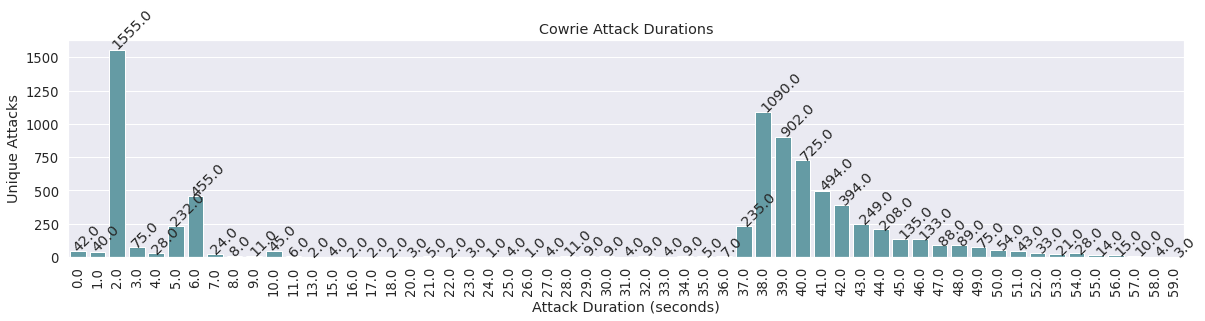

In [23]:
cowrie_attacks_lt_60_df = cowrie_attacks_df[cowrie_attacks_df['attack_duration'] < 60]
cowrie_attacks_duration_group_df = cowrie_attacks_lt_60_df.groupby(
    'attack_duration'
)['id'].count().to_frame(name='attacks')

sns.set(font_scale=1.2, rc={'figure.figsize':(20, 4)})
fg = sns.barplot(data=cowrie_attacks_duration_group_df,
                 x=cowrie_attacks_duration_group_df.index,
                 y='attacks',
                 color='#5aa2af', dodge=False)

fg.set_xticklabels(fg.get_xticklabels(), rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Attack Duration (seconds)', ylabel='Unique Attacks', title='Cowrie Attack Durations')

This graph depicts unique counts of attacks over a given frequency, from 0 to 60 seconds. the highest being attacks lasting 2 seconds with a large portion in the 35 to 45 second range.

In [24]:
if export_graphs: fg.get_figure().savefig(
    'questions/Q7_fig2_attack_duration_60s.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q7_fig2_attack_duration_60s.html', 'w') as f:
        f.write(cowrie_attacks_duration_group_df.to_html())
if export_excel: cowrie_attacks_duration_group_df.to_excel('excelsheets/Q7_fig2_attack_duration_60s.xlsx')
# plt.clf()

[Text(0, 0.5, 'Unique Attacks'),
 Text(0.5, 0, 'Attack Duration (seconds)'),
 Text(0.5, 1.0, 'Cowrie Attack Durations')]

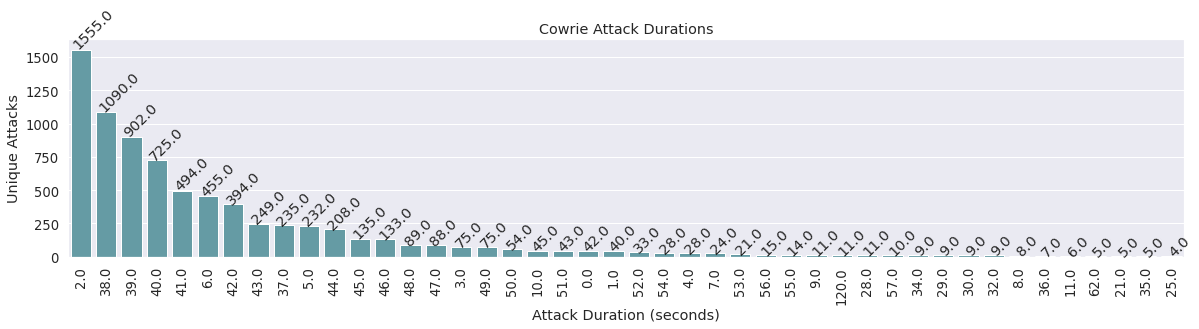

In [25]:
cowrie_sorted_attack_duration_highest_25 = cowrie_attacks_df.groupby(
    'attack_duration'
)['id'].count().to_frame(name='attacks').sort_values(by='attacks', ascending=False)[:25]

fg = sns.barplot(data=cowrie_sorted_attack_duration_highest_25,
                 order=cowrie_sorted_attack_duration_highest_25.index,
                 x=cowrie_sorted_attack_duration_highest_25.index,
                 y='attacks',
                 color='#5aa2af', dodge=False)

fg.set_xticklabels(fg.get_xticklabels(), rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Attack Duration (seconds)', ylabel='Unique Attacks', title='Cowrie Attack Durations')

In [26]:
if export_graphs: fg.get_figure().savefig(
    'questions/Q7_fig3_attack_duration_top_25.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q7_fig3_attack_duration_top_25.html', 'w') as f:
        f.write(cowrie_sorted_attack_duration_highest_25.to_html())
if export_excel: cowrie_sorted_attack_duration_highest_25.to_excel('excelsheets/Q7_fig3_attack_duration_top_25.xlsx')
# plt.clf()

This graph depicts attack durations ordered from most occurant to least for the top 25 highest attack durations. 

## Question 8
### Most Prolific IPs

In [27]:
# for file in ['elastichoney_1.csv', 'dionaea_1.csv', 'snort_1.csv',
#            'cowrie_1.csv', 'glastopf_1.csv', 'shockpot_1.csv', 'wordpot_1.csv']:
#     uip_df = pd.read_csv(file, sep='\t')
#     uips = uip_df['destination_ip'].unique()
#     print(f'{file}: {uips}')

In [28]:
honeypots_scanned_df = df.groupby('source_ip').agg({
    'city': lambda city: city.unique(), 
    'country': lambda country: country.unique(),
    'destination_ip': lambda ip: ip.nunique()
}).sort_values(by='destination_ip', ascending=False).rename(
    columns={'destination_ip': 'Unique Honeypots'})

# honeypots_scanned_df

In [29]:
if export_html:
    with open('questions/Q8.html', 'w') as f:
        f.write(honeypots_scanned_df.to_html())
if export_excel: honeypots_scanned_df.to_excel('excelsheets/Q8.xlsx')

## Question 9
### Attacks from Countrys Tor vs non-Tor

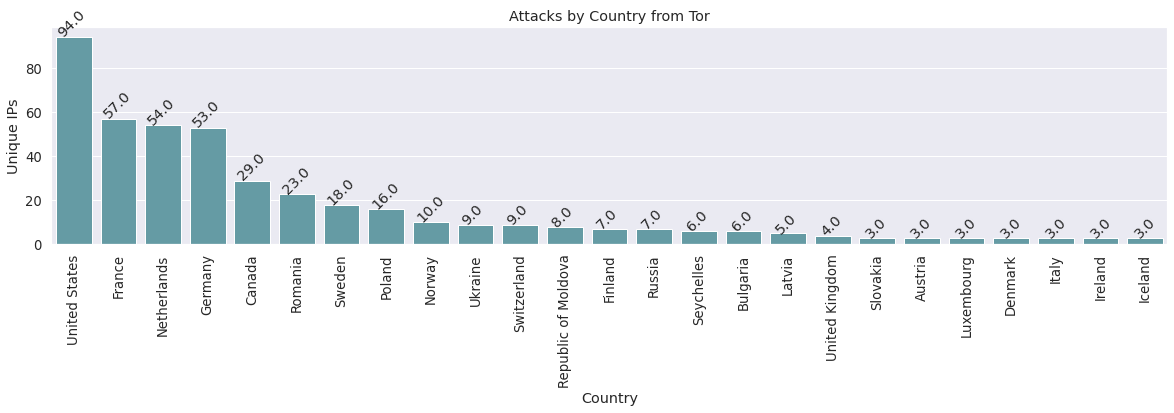

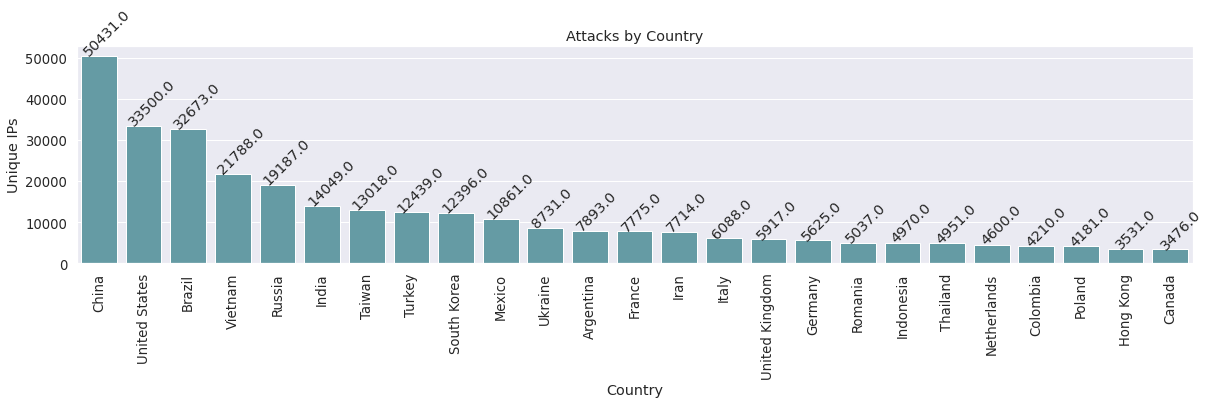

In [30]:
torips_df = df.loc[df['Tor_flag'] == 'Y'].groupby(
    'country'
)['source_ip'].nunique().to_frame(name='ips').sort_values(by='ips', ascending=False)[:25]
ntorips_df = df.loc[df['Tor_flag'] == 'N'].groupby(
    'country'
)['source_ip'].nunique().to_frame(name='ips').sort_values(by='ips', ascending=False)[:25]
torips_df['Tor_flag'] = 'Y'
ntorips_df['Tor_flag'] = 'N'

fg = sns.barplot(data=torips_df,
                 x=torips_df.index,
                 y='ips',
                 color='#5aa2af', dodge=False)

fg.set_xticklabels(fg.get_xticklabels(), rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Country', ylabel='Unique IPs', title='Attacks by Country from Tor')

if export_graphs: fg.get_figure().savefig('questions/Q9_tor.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q9_tor.html', 'w') as f:
        f.write(torips_df.to_html())
if export_excel: torips_df.to_excel('excelsheets/Q9_tor.xlsx')
plt.show()
# plt.clf()

fg = sns.barplot(data=ntorips_df,
                 x=ntorips_df.index,
                 y='ips',
                 color='#5aa2af', dodge=False)

fg.set_xticklabels(fg.get_xticklabels(), rotation=90)

for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
fg.set(xlabel='Country', ylabel='Unique IPs', title='Attacks by Country')

if export_graphs: fg.get_figure().savefig('questions/Q9.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q9.html', 'w') as f:
        f.write(ntorips_df.to_html())
if export_excel: ntorips_df.to_excel('excelsheets/Q9.xlsx')
plt.show()
# plt.clf()

These graphs show a given countries unique ips graphed for ips coming from known Tor exit nodes in the first graph and not from Tor exit nodes in the second.

## Question 10
### Cowrie scan attack pairs

In [31]:
def in_unique_loggins(logins):
    for login in logins:
        if login in unique_logins: return True
    return False

def cred_check(logins):
    # cred check can return the first occurance of the correct cred attempt as 
    # all subsequent attempts by every ip uses the same login. that is no ip
    # guesses more than one correct cred
    for login in logins:
        if login in unique_logins: return login
    return None

def get_cred_first_appearance(ip):
    for i, row in cowrie_df[cowrie_df['source_ip'] == ip].iterrows():
        for cred in row['credential_lol']:
            if cred in unique_logins: return i, ip, str(cred)
    return None, ip, None

        
def scan_attack_grouper(ips, timeframe):
    dataframe = cowrie_df.loc[cowrie_df['source_ip'].isin(ips)]
    # there are no none logggins to the cowrie honeypot at 192.168.10.5
    # loggedin['destination_ip'].unique() returns only 10.2
    # dataframe = dataframe[dataframe['destination_ip'] == '192.168.10.2']
    if timeframe:
        start_date, end_date = timeframe
        mask = (dataframe['timestamp'] > start_date) & (dataframe['timestamp'] <= end_date)
        dataframe = dataframe.loc[mask]

    scan_attack_ip_grouped = dataframe.groupby(
        'source_ip'
    ).resample('30T')['id'].nunique().to_frame(name='attacks')
    scan_attack_ip_grouped = scan_attack_ip_grouped.loc[(scan_attack_ip_grouped!=0).any(axis=1)].unstack('source_ip')
    return scan_attack_ip_grouped, dataframe

def average_attack_speed(group, resample):
    return group.groupby('source_ip').resample(resample).count()['id'].unstack().mean(axis=1)

def run_graph(scan, attack):
    ips = [scan[0], attack]
    start_date = scan[1] - pd.Timedelta('30 days')
    end_date = scan[1] + pd.Timedelta('30 days')
    timeframe = [start_date, end_date]
    scan_attack_ip_group_x, scan_attack_ip_df_x = scan_attack_grouper(ips, timeframe)

    fg = scan_attack_ip_group_x.plot(marker='.', linestyle='None')
    for p in fg.patches:
        fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.xlabel('Time')
    plt.ylabel('Attacks')
    plt.title('Scan/Attack Group')
    
#     group_x_df = scan_attack_ip_df_x.groupby('source_ip').agg({
#         'id': lambda i: i.nunique(),
#         'credentials': lambda cred: list(cred.unique()),
#         'loggedin': lambda log: list(log.unique()),
#         'timestamp': lambda time: list([time.min(), time.max()]),
#     }).rename(columns={'id': 'count'}).sort_values(by='timestamp')

#     group_x_df

In [32]:
# this method of selection causes loss of those scanners that have logged in
# when attempting to select scanners and attackers
# This method is also flawed in that it doesn't groupby ip first so any
# occurance where either of the two conditionals is true will add that ip
# ie. ips can be placed in both loggedin and nloggedin if one of their rows
# is truethy to the conditionals below this may or may not be wanted? I don't know
loggedin = cowrie_df[(cowrie_df['loggedin'] != 'None') & (cowrie_df['loggedin'] != '[]')]
nloggedin = cowrie_df[(cowrie_df['loggedin'] == 'None') & (cowrie_df['credentials'] != '[]')]

unique_login_strings = list(cowrie_df['loggedin'].unique())[1:] # remove 'None'
unique_logins = list(map(lambda cred: eval(cred), cowrie_df[cowrie_df['loggedin'] != 'None']['loggedin'].unique()))

In [33]:
attackingips = loggedin.drop('timestamp', axis=1).groupby(['source_ip', 'timestamp']).agg({
    'id': lambda x: x.nunique(),
    'credentials': lambda cred: cred.unique(),
    'loggedin': lambda loggin: loggin.unique(),
}).rename(columns={'id': 'count'})
# attackingips

In [34]:
scanningips = nloggedin.drop('timestamp', axis=1).groupby(['source_ip', 'timestamp']).agg({
    'id': lambda x: x.nunique(),
    'credential_lol':  lambda cred_list: list(j for i in cred_list for j in i),
    'loggedin': lambda cred: cred.unique(),
    'destination_ip': lambda ip: ip.unique(),
}).rename(columns={'id': 'count'})

# running cred_check on the scanningips dataframe then remove instances
# where 'correct_creds' == None might be faster than running map and apply
scanningips = scanningips[scanningips['credential_lol'].map(in_unique_loggins)]
scanningips['correct_creds'] = scanningips['credential_lol'].apply(cred_check)

# scanningips

In [35]:
# cred_appearance = {}
# for ip in cowrie_df['source_ip'].unique():
#     time, cred_ip, cred = get_cred_first_appearance(ip)
#     if time == None: continue
#     c = cred_appearance.get(cred, '')
#     if c == '' or c[0] > time:
#         cred_appearance[cred] = [time, cred_ip]

This is the output of the above command finding the first occurance of each password

{"['root', '123123']": [Timestamp('2016-09-21 03:02:39.726000'),'91.201.236.158'],

"['root', '135790']": [Timestamp('2016-09-29 18:40:33.666000'),'119.249.54.88'],

"['root', 'password1234']": [Timestamp('2017-04-07 11:34:47.459000'),'61.177.172.44']}

In [36]:
# unique_login_strings

In [ ]:
index_delta = 5
possible_scan_attack_pairs = pd.DataFrame()
for ip, data in scanningips.iterrows():
    scanip_credential_discovery = ip[1]
    
# an alternate method which acquires the nearest record in the loggedin dataframe then
# selects the next {index_delta}
#     index_start_location = loggedin.index.get_loc(scanip_credential_discovery, method='nearest')
#     index_end_location = index_start_location + index_delta
#     selection_df = loggedin.iloc[index_start_location:index_end_location].copy()

    end_time = scanip_credential_discovery + pd.Timedelta('30 days')
    mask = (loggedin['timestamp'] > scanip_credential_discovery) & (loggedin['timestamp'] <= end_time)
    selection_df = loggedin.loc[mask].copy()
    
    for time, selection_df_data in selection_df.iterrows():
        scanip_attackip_timedelta = abs((time - scanip_credential_discovery).total_seconds())

        if scanip_credential_discovery > time or scanip_attackip_timedelta > pd.Timedelta('30 days').total_seconds():
            selection_df = selection_df.drop(time)
            continue
        if not eval(selection_df_data['loggedin']) == data['correct_creds']:
            selection_df = selection_df.drop(time)
            continue
        # if a scanner and attacker are not targeting the same destination ip
        # it can be easily reasoned they are not a pair
        # it seems as though all logins happen on 192.168.10.2 there are non
        # on 10.5 
        # this reduces the output to almost nothing, this method needs revision
        if not selection_df_data['destination_ip'] == data['destination_ip']:
            selection_df = selection_df.drop(time)

    selection_df['scanip_timestamp'] = scanip_credential_discovery
    pairs = pd.concat([selection_df[['source_ip', 'credentials', 'loggedin', 'scanip_timestamp']]], keys=[ip[0], 'timestamp'], names=['scanip'])
    possible_scan_attack_pairs = possible_scan_attack_pairs.append(pairs)

# possible_scan_attack_pairs

In [ ]:
nloggedin.groupby('destination_ip')['id'].count()

the code below with display a dataframe of the possible scan/attack pairs gathered using the formula above as well as graph all pairs

In [ ]:
# pd.set_option('display.max_rows', None)
# possible_scan_attack_pairs.drop_duplicates()

In [ ]:
# for scan, attack in possible_scan_attack_pairs['source_ip'].drop_duplicates().iteritems():
#     for ip in [scan[0], attack]:
#         print(get_cred_first_appearance(ip))
#     print('')
#     run_graph(scan, attack)

In [ ]:
sns.set(rc={'figure.figsize':(11, 4)})

### First Scan/Attack Pair

In [ ]:
ips = ['218.65.30.122', '61.177.172.19', '59.63.166.80', '158.69.79.38', ]
start_date = pd.to_datetime('2017-07-15')
end_date = pd.to_datetime('2017-07-17')
timeframe = [start_date, end_date]
scan_attack_ip_group_1, scan_attack_ip_df_1 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_1.plot(marker='.', linestyle='None')
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Scan/Attack Group 1')

In [ ]:
# scan_attack_ip_df_1[scan_attack_ip_df_1['destination_ip'] == '192.168.10.2']

In [ ]:
group_1_df = scan_attack_ip_df_1.groupby('source_ip').agg({
    'id': lambda i: i.nunique(),
    'credentials': lambda cred: list(cred.unique()),
    'loggedin': lambda log: list(log.unique()),
    'timestamp': lambda time: list([time.min(), time.max()]),
}).rename(columns={'id': 'count'}).sort_values(by='timestamp')

# group_1_df

In [ ]:
# scan_attack_ip_df_1[scan_attack_ip_df_1['source_ip'] == '158.69.79.38'][['source_ip', 'credentials', 'loggedin']]

In [ ]:
creds = group_1_df['credentials'].apply(lambda cred_list: list(eval(cred) for cred in cred_list))
creds = creds.apply(lambda cred_list: list(j for i in cred_list for j in i))
creds = creds.apply(lambda cred_list: list(str(cred) for cred in cred_list))
creds = creds.agg(lambda x: list(set(x)))

# import pprint
# pp = pprint.PrettyPrinter()
full_cred_list = []
for cred_list in creds:
    for cred in cred_list:
        full_cred_list.append(cred)
#     pp.pprint(cred)

full_cred_list = set(full_cred_list)

In [ ]:
for ip, cred_list in creds.items():
    print(ip, len(cred_list)/len(full_cred_list))

In [ ]:
def credential_list_similarity(cred_list1, cred_list2):
    return len(list(cred for cred in cred_list1 if cred in cred_list2)) / len(cred_list1)

In [ ]:
print(credential_list_similarity(creds['59.63.166.80'], creds['61.177.172.19']))

In [ ]:
if export_graphs: fg.get_figure().savefig('questions/Q10_group_1.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q10_group_1.html', 'w') as f:
        f.write(group_1_df.to_html())
if export_excel: group_1_df.to_excel('excelsheets/Q10_group_1.xlsx')
# plt.clf()

This group of scan/attack pairs shows three scanners attempting password combinations over the course of 2 days. The IP “218.65.30.122” is the first to discover the honeypot on July 15, 2017 at 3:30 in the morning attempting an average of 1 username, password pair every minute. Followed by “61.177.172.19” and “59.63.166.80”. These three scanners attempt a similar list of passwords and have a similar attack speed over the course of these 2 days. The password list similarity is tested by collecting a list of all unique username, password attempts between these scanners and dividing the length of an IP’s credential list  by the full list of unique credentials. This method shows “61.177.172.19”’s list of credentials consisting of 77% of the full credential list. “59.63.166.80”’s credentials list consists of 69% of the full list. The similarity between these two list is ~68%, tested by gathering a list of credentials from the first IP that also appear in the second IP’s list and dividing by the length of the first IP’s credential list. The third IP (218.65.30.122) having the smallest list length only consists of ~25% of the full list but has a similarity to “59.63.166.80” of ~97%. That is to say “218.65.30.122”’s list of credentials consists of credentials almost all found within “59.63.166.80”’s list. These IPs All find a correct login with ('root', '135790'). The 4th IP (158.69.79.38) near the end of the scan/attack uses the correct login having not attempted any combinations prior. From this it can be assumed these three scanners were a pair to the attacker “158.69.79.38”.


### Second Scan/Attack Pair

In [ ]:
# get_cred_first_appearance('')

In [ ]:
ips = ['61.177.172.20', '199.231.68.230']

start_date = pd.to_datetime('2018-05-08')
end_date = pd.to_datetime('2018-05-24')
timeframe = [start_date, end_date]
scan_attack_ip_group_2, scan_attack_ip_df_2 = scan_attack_grouper(ips, None)

fg = scan_attack_ip_group_2.plot(marker='.', linestyle='None')
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Scan/Attack Group 2')

In [ ]:
# scan_attack_ip_df_2[scan_attack_ip_df_2['loggedin'] == '[\'root\', \'123123\']'][['source_ip', 'credentials', 'loggedin']].sort_values(by='timestamp')[:1]
# scan_attack_ip_df_2[scan_attack_ip_df_2['source_ip'] == '199.231.68.230'][['source_ip', 'credentials', 'loggedin']].sort_values(by='timestamp')

In [ ]:
group_2_df = scan_attack_ip_df_2.groupby('source_ip').agg({
    'id': lambda i: i.nunique(),
    'credentials': lambda cred: list(cred.unique()),
    'loggedin': lambda log: list(log.unique()),
    'timestamp': lambda time: list([time.min(), time.max()]),
}).rename(columns={'id': 'count'}).sort_values(by='timestamp')

# group_2_df

In [ ]:
if export_graphs: fg.get_figure().savefig('questions/Q10_group_2.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q10_group_2.html', 'w') as f:
        f.write(group_2_df.to_html())
if export_excel: group_2_df.to_excel('excelsheets/Q10_group_2.xlsx')
# plt.clf()

The second scan/attack pair discovered was ‘61.177.172.20’ and ‘199.231.68.230’. These IPs show the ‘scanner’ (‘61.177.172.20’) attempting a large set of passwords in a short time window. A total of 726 attempts between 6:45 and 12:14 on 05-08-2018. Arriving at a correct username, password combo only 10 minutes after the start of attempts. The ‘attack’ IP in this instance attempted the correct username password combination (‘root’, ‘123123’) only half an hour after the start of 61.177.172.20’s attempts. This IP having not attempted any combinations prior can be assumed to accompany the former. 

### Third Scan/Attack Pair

In [ ]:
ips = ['193.201.224.206', '193.201.224.212',]# '109.236.91.85', '195.3.147.49' ]

start_date = pd.to_datetime('2018-05-08')
end_date = pd.to_datetime('2018-05-24')
timeframe = [start_date, end_date]
scan_attack_ip_group_3, scan_attack_ip_df_3 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_3.plot(marker='.', linestyle='None')
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Scan/Attack Group 3')

In [ ]:
group_3_df = scan_attack_ip_df_3.groupby('source_ip').agg({
    'id': lambda i: i.nunique(),
    'credentials': lambda cred: list(cred.unique()),
    'loggedin': lambda log: list(log.unique()),
    'timestamp': lambda time: list([time.min(), time.max()]),
    'subnet': lambda subnet: subnet.unique(),
}).rename(columns={'id': 'count'}).sort_values(by='timestamp')

# group_3_df

In [ ]:
# cowrie_df[cowrie_df['subnet'] == '193.201.224.0/24'].groupby('source_ip').agg({
#     'id': lambda i: i.nunique(),
#     'credentials': lambda cred: list(cred.unique()),
#     'loggedin': lambda log: list(log.unique()),
#     'timestamp': lambda time: list([time.min(), time.max()]),
#     'subnet': lambda subnet: subnet.unique(),
# }).rename(columns={'id': 'count'}).sort_values(by='timestamp')

In [ ]:
if export_graphs: fg.get_figure().savefig('questions/Q10_group_3.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q10_group_3.html', 'w') as f:
        f.write(group_3_df.to_html())
if export_excel: group_3_df.to_excel('excelsheets/Q10_group_3.xlsx')
# plt.clf()

### Forth Scan/Attack Pair

In [ ]:
ips = ['218.87.109.248', '149.56.24.204']

start_date = pd.to_datetime('2016-09-20')
end_date = pd.to_datetime('2016-09-27')
timeframe = [start_date, end_date]
scan_attack_ip_group_4, scan_attack_ip_df_4 = scan_attack_grouper(ips, timeframe)

fg = scan_attack_ip_group_4.plot(marker='.', linestyle='None')
for p in fg.patches:
    fg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Time')
plt.ylabel('Attacks Per 30 minutes')
plt.title('Scan/Attack Group 4')
plt.show()

In [ ]:
group_4_df = scan_attack_ip_df_4.groupby('source_ip').agg({
    'id': lambda i: i.nunique(),
    'credentials': lambda cred: list(cred.unique()),
    'loggedin': lambda log: list(log.unique()),
    'timestamp': lambda time: list([time.min(), time.max()]),
}).rename(columns={'id': 'count'}).sort_values(by='timestamp')

# group_4_df

In [ ]:
if export_graphs: fg.get_figure().savefig('questions/Q10_group_4.png', bbox_inches='tight', dpi=1200)
if export_html:
    with open('questions/Q10_group_4.html', 'w') as f:
        f.write(group_4_df.to_html())
if export_excel: group_4_df.to_excel('excelsheets/Q10_group_4.xlsx')
# plt.clf()